Machine Learning Engineer Nanodegree
## Capstone Final Notebook
Xiaochuan Yi
May 18 2018




### Domain Background


Long term home price predication is always challenging. But short term home price predication is gaining success in recent years due to quality machine learning research done in this area. Housing data is publicly available including many features of houses and transaction price in market place. This makes home price predication is a suitable area to apply machine learning models.  Companies such as Zillow and Redfin have already provided home price estimation services and their price estimation has become more and more valuable to customers, either pricing a home when selling or looking for offer price guidance when buying a home. 

The Zestimate home valuation is Zillow's estimated market value, computed using a proprietary formula. It is not an appraisal. It is a starting point in determining a home's value. The Zestimate is calculated from public and user-submitted data, taking into account special features, location, and market conditions. 

From my person experience, Zestimate is a very good guide to determine buying and selling price of a home in the metropolitan area where I live. I am curious of how Zestimate is calculated and why its precision is improving over the years. 
On May 24 2017, Kaggle opened a 1 Million dollar competition predicting short term future house price (Zestimate) residual errors.  The participants were asked to develop an algorithm that makes predictions about the future sale prices of homes. 
At the time when I write the proposal, the competition is already over. However, the dataset of the competition is of high quality. In addition its scoring tool is still available for me to evaluate my solutions.

“Zestimates” are estimated home values based on 7.5 million statistical and machine learning models that analyze hundreds of data points on each property. And, by continually improving the median margin of error (from 14% at the onset to 5% today), Zillow has since become established as one of the largest, most trusted marketplaces for real estate information in the U.S. and a leading example of impactful machine learning.

<Student briefly details background information of the domain from which the project is proposed. Historical information relevant to the project should be included. It should be clear how or why a problem in the domain can or should be solved. Related academic research should be appropriately cited. A discussion of the student personal motivation for investigating a particular problem in the domain is encouraged but not required.>


### Problem Statement

Following the Zillow competition, for each property (unique parcelid) along with it many features, a log error will be predicted for each specified time point. I will be predicting 6 timepoints: October 2016 (201610), November 2016 (201611), December 2016 (201612), October 2017 (201710), November 2017 (201711), and December 2017 (201712). According to the competition, the submission file should contain a header and have the following format:

ParcelId,201610,201611,201612,201710,201711,201712
10754147,0.1234,1.2234,-1.3012,1.4012,0.8642-3.1412
10759547,0,0,0,0,0,0
etc.

Note that the actual log errors are accurate to the 4th decimal places.

The log error is defined as

logerror=log(Zestimate)−log(SalePrice)

The Kaggle competition provides real estate data for three counties in and around Los Angeles, CA.  Each observation of a property has 56 features; no additional features from outside data sources will be allowed in the analysis. 

The data files are
1. 2016 Training data file with ParcelId, actual logerror = log(Zestimate) - log(SalesPrice) and transaction date. The 2016 properties file contains feature information for 90,725 properties
2. Prediction set with only the feature information for 2,985,217 properties.  

Submissions will be scored based on the MAE (mean absolute error) across all predictions.

<In this section, clearly describe the problem that is to be solved. The problem described should be well defined and should have at least one relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms) , measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).>

### Datasets and Inputs




<In this section, the dataset(s) and/or input(s) being considered for the project should be thoroughly described, such as how they relate to the problem and why they should be used. Information such as how the dataset or input is (was) obtained, and the characteristics of the dataset or input, should be included with relevant references and citations as necessary It should be clear how the dataset(s) or input(s) will be used in the project and whether their use is appropriate given the context of the problem.>

There are a total of 58 features in the property data file including the property id (parcelid). Let's load the data into pandas dataframe and study feature data type, distribution and missing value issues. 

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib, sys
%matplotlib inline

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

matplotlib.rc('font', size=MEDIUM_SIZE)
matplotlib.rc('axes', titlesize=MEDIUM_SIZE)


In [4]:
# load housing data set

if sys.platform=='win32':
    Data_path="d:/projects/zillow_data"
elif sys.platform=='linux2':
    Data_path='/home/voyiger/projects/zillow_data'
elif sys.platform=='darwin':
    Data_path="~/projects/zillow_data"
else:
    print (os.name)
    
df_prop = pd.read_csv(os.path.join(Data_path,'properties_2016.csv'),low_memory=False)
df_train = pd.read_csv(os.path.join(Data_path,'train_2016_v2.csv'),low_memory=False)

In [23]:
df_prop.shape, df_train.shape

((2985217, 58), (90275, 3))

Both training dataframe and properties dataframe have column 'parcelid', which is unique for each property. These two dataframes can be merged on parcelid.

In [5]:
df_prop.columns, df_train.columns

(Index([u'parcelid', u'airconditioningtypeid', u'architecturalstyletypeid',
        u'basementsqft', u'bathroomcnt', u'bedroomcnt', u'buildingclasstypeid',
        u'buildingqualitytypeid', u'calculatedbathnbr', u'decktypeid',
        u'finishedfloor1squarefeet', u'calculatedfinishedsquarefeet',
        u'finishedsquarefeet12', u'finishedsquarefeet13',
        u'finishedsquarefeet15', u'finishedsquarefeet50',
        u'finishedsquarefeet6', u'fips', u'fireplacecnt', u'fullbathcnt',
        u'garagecarcnt', u'garagetotalsqft', u'hashottuborspa',
        u'heatingorsystemtypeid', u'latitude', u'longitude',
        u'lotsizesquarefeet', u'poolcnt', u'poolsizesum', u'pooltypeid10',
        u'pooltypeid2', u'pooltypeid7', u'propertycountylandusecode',
        u'propertylandusetypeid', u'propertyzoningdesc',
        u'rawcensustractandblock', u'regionidcity', u'regionidcounty',
        u'regionidneighborhood', u'regionidzip', u'roomcnt', u'storytypeid',
        u'threequarterbathnbr', u'type

#### Exploration of housing data features and their data types

In [6]:
df_prop.shape

(2985217, 58)

In [7]:
print (df_prop.dtypes.sort_values())

parcelid                          int64
pooltypeid10                    float64
pooltypeid2                     float64
pooltypeid7                     float64
propertylandusetypeid           float64
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidneighborhood            float64
regionidzip                     float64
roomcnt                         float64
storytypeid                     float64
threequarterbathnbr             float64
typeconstructiontypeid          float64
unitcnt                         float64
yardbuildingsqft17              float64
yardbuildingsqft26              float64
yearbuilt                       float64
numberofstories                 float64
structuretaxvaluedollarcnt      float64
taxvaluedollarcnt               float64
assessmentyear                  float64
landtaxvaluedollarcnt           float64
taxamount                       float64
taxdelinquencyyear              float64


#### Identified each data type and deal with missing values

Discrete features with no ordering:
- parcelid:	 Unique identifier for parcels (lots). In other word, unique identification number for each property
- airconditioningtypeid: air conditioning types. It is possilbe certain air conditioning is of higher end than others. So transform the type to ordered numbers will be helpful.
- architecturalstyleid: architectural styles, it is possible one style is more luxurious than other styles. So if we can set ordering that is related to house price, then code the style in ordered number will be helpful.
- buildingclasstypeid: building class type
- buildingqualitytypeid: building quality type
- decktypeid: deck type 
- heatingorsystemtypeid: Type of home heating system
- typeconstructiontypeid:	 What type of construction material was used to construct the home

Numberical features that are continuous or fine grain:
- basementsqft: basement area in square footage
- finishedfloor1squarefeet:	 Size of the finished living area on the first (entry) floor of the home
- calculatedfinishedsquarefeet:	 Calculated total finished living area of the home 

- finishedsquarefeet6:	Base unfinished and finished area
- finishedsquarefeet12:	Finished living area
- finishedsquarefeet13:	Perimeter  living area
- finishedsquarefeet15:	Total area
- finishedsquarefeet50:	 Size of the finished living area on the first (entry) floor of the home

- garagetotalsqft: Total number of square feet of all garages on lot including an attached garage
- lotsizesquarefeet:	 Area of the lot in square feet
- yardbuildingsqft17:	Patio in  yard
- yardbuildingsqft26:	Storage shed/building in yard
- poolsizesum:	 Total square footage of all pools on property
- taxamount:	The total property tax assessed for that assessment year
- taxvaluedollarcnt:	The total tax assessed value of the parcel
- structuretaxvaluedollarcnt:	The assessed value of the built structure on the parcel
- landtaxvaluedollarcnt:	The assessed value of the land area of the parcel
- latitude:	 Latitude of the middle of the parcel multiplied by 10e6, location of the property
- longitude:	 Longitude of the middle of the parcel multiplied by 10e6, location of the property

Numerical features that are discrete with small set of values:
- roomcnt: Total number of rooms in the principal residence
- threequarterbathnbr:	 Number of 3/4 bathrooms in house (shower + sink + toilet)
- bathroomcnt: number of bathrooms
- bedroomcnt: number of bedrooms
- calculatedbathnbr: calculate bath number
- fireplacecnt : number of fireplaces
- fullbathcnt: number of full bathrooms (sink, shower + bathtub, and toilet)
- garagecarcnt: Total number of garages on the lot including an attached garage
- numberofstories:	 Number of stories or levels the home has
- poolcnt:	 Number of pools on the lot (if any)

Boolean features:
- fireplaceflag: is a fireplace present in the house, True or missing(treated as False)
- hashottuborspa:	 Does the home have a hot tub or spa, true or missing(treated as False)
- taxdelinquencyflag: Property taxes for this parcel are past due as of 2015, Y or missing(treated as N), transformed to True or False

Other features: 
- fips: Federal Information Processing Standard code, will be not used
- regionidcounty:	County in which the property is located
- regionidcity:	 City in which the property is located (if any)
- regionidzip:	 Zip code in which the property is located
- regionidneighborhood:	Neighborhood in which the property is located

In [38]:
#check boolean feature
df_prop.fireplaceflag.unique()


array([nan, True], dtype=object)

In [42]:
#check boolean feature
df_prop.hashottuborspa.unique()

array([nan, True], dtype=object)

In [40]:
#check boolean feature
df_prop.taxdelinquencyflag.unique()

array([nan, 'Y'], dtype=object)

In [43]:
df_prop.propertycountylandusecode.unique()

array(['010D', '0109', '1200', '1210', '010V', '300V', '0100', '0200',
       '010C', '0300', '1204', '100V', '01HC', '120C', '040V', '1214',
       '0101', nan, '070P', '0700', '1', '128', '0', '1112', '5050',
       '1110', '1118', '010E', '1111', '1129', '1420', '1222', '1128',
       '1310', '1117', '1333', '1116', '1410', '0104', '070D', '0108',
       '012C', '0400', '0103', '01DC', '0201', '010M', '030V', '0110',
       '010F', '010G', '010H', '0301', '0102', '020E', '020M', '0401',
       '0113', '0141', '122', '38', '135', '96', '71', '73', '34', '0209',
       '040G', '010L', '012E', '0111', '1720', '1014', '012D', '1213',
       '1201', '1321', '1444', '1421', '0140', '0123', '0133', '020G',
       '030G', '105', '0204', '010T', '0120', '1202', '121G', '010X',
       '020V', '880V', '1120', '0130', '0118', '01HE', '120G', '5060',
       '0131', '0203', '011C', '1215', '1212', '040D', '120T', '0420', '8',
       '1203', '070X', '0114', '030E', '121T', '1012', '121C', '0105', 

In [10]:
df_prop.propertyzoningdesc.unique()

array([nan, 'LCA11*', 'LAC2', ..., 'WCR1400000', 'EMPYYY', 'RMM2*'], dtype=object)

In [11]:
df_prop.roomcnt.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: roomcnt, dtype: float64

#### Data feature distribution study
There are 58 featues. Some are numerical variables such as:
roomcnt, bathroomcnt, bedroomcnt, finishedfloor1squarefeet, calculatedfinishedsquarefeet, lotsizesquarefeet, fullbathcnt,
garagecarcnt,garagetotalsqft. 

Some are categorical variables such as:
fireplaceflag,hashottuborspa,taxdelinquencyflag, propertycountylandusecode, heatingorsystemtypeid

Let's look deeper into the numerical variables. Some numerical variables have larger range such as finishedfloor1sqaurefeet. Let's treat them as continuous variables. Some numerical variables have smaller number of possible values, such as bathroomcnt and bedroomcnt. 

Let's study the distribution of values of numerical data features with larger range. I have found that most of these features are skewed rather than symmetric or normal distriubtions. Check the following distribution plots.


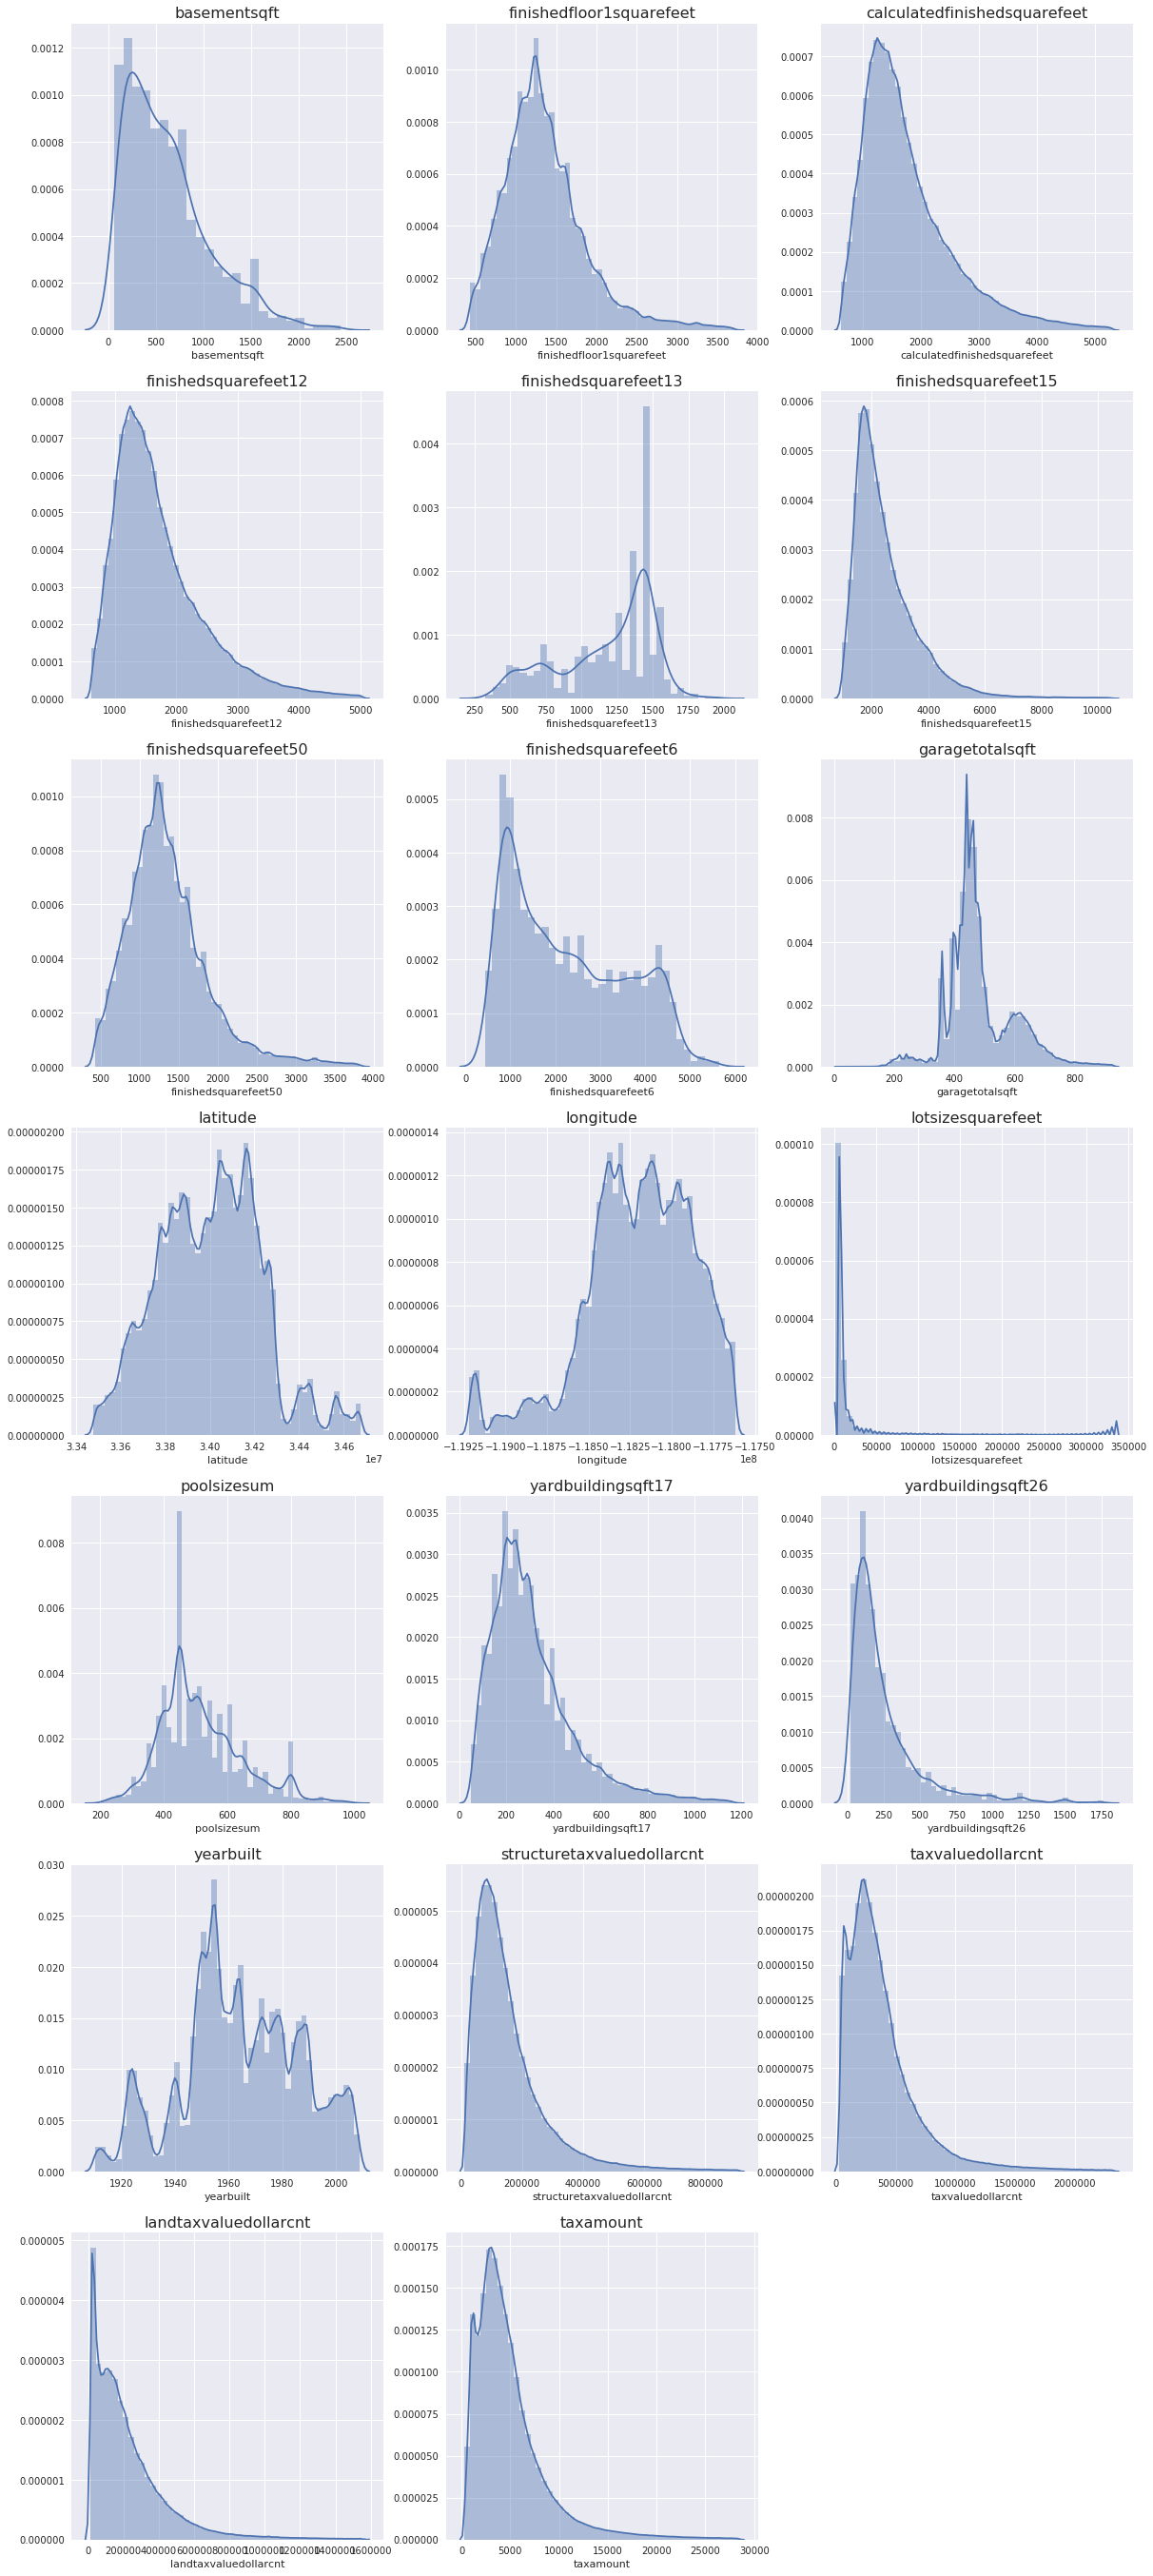

In [32]:
numerical_large_range = ['basementsqft', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 
              'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
              'finishedsquarefeet50', 'finishedsquarefeet6', 'garagetotalsqft', 'latitude',
              'longitude', 'lotsizesquarefeet', 'poolsizesum',  'yardbuildingsqft17',
              'yardbuildingsqft26', 'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
              'landtaxvaluedollarcnt', 'taxamount']

numerical_small_range = ['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'fireplacecnt', 'fullbathcnt',
            'garagecarcnt', 'poolcnt', 'roomcnt', 'threequarterbathnbr', 'unitcnt',
            'numberofstories', 'assessmentyear', 'taxdelinquencyyear']
k=0
fig = plt.figure(figsize=(20, 70))
for col in numerical_large_range:
    k+=1
    ax=fig.add_subplot(10,3,k) #,figsize=(20,100)
    values = df_prop[col].dropna()
    lower = np.percentile(values, 1)
    upper = np.percentile(values, 99)
    sns.distplot(values[(values>lower) & (values<upper)]) #, ax = plt.subplot(121));
    ax.set_title(col, fontsize=16)      

/home/voyiger/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/voyiger/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/voyiger/anaconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/voyiger/anaconda2/lib/python2.7/site-packages/seaborn/distributions.py:192: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/voyiger/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


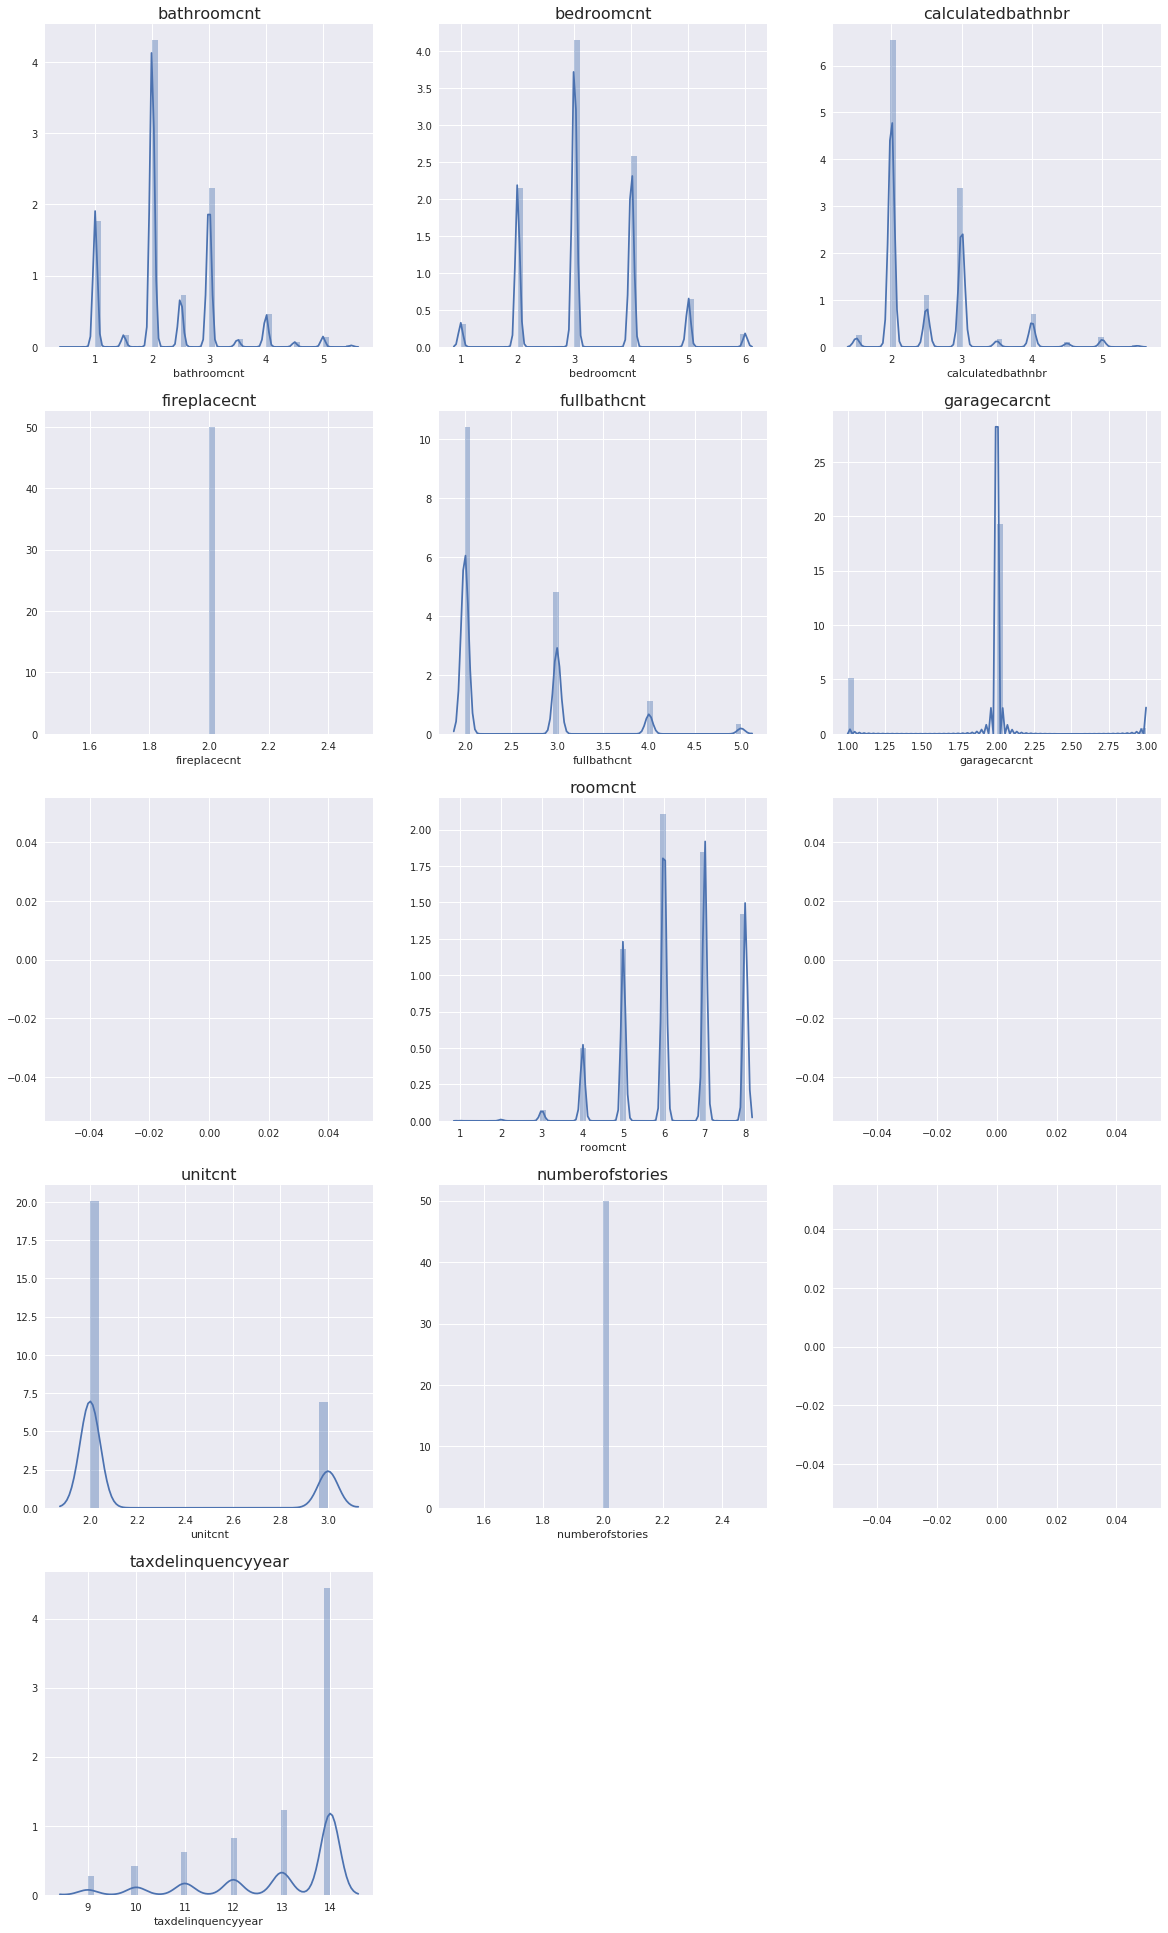

In [13]:

k=0
fig = plt.figure(figsize=(20, 70))
for col in numerical_small_range:
    try:
        k+=1
        ax=fig.add_subplot(10,3,k) #,figsize=(20,100)
        values = df_prop[col].dropna()
        lower = np.percentile(values, 1)
        upper = np.percentile(values, 99)
        sns.distplot(values[(values>lower) & (values<upper)]) #, ax = plt.subplot(121));
        ax.set_title(col, fontsize=16)      
    except:
        pass


#### Dealing with missing values (Nan in pandas)

Let's run the following pandas data analysis to find out the number of missing values for each feature. I have found that there are more than 33 features that have more than 25% missing values. I will drop these features that have too many missing values. For 3 boolean features, I will consider replace missing value with False. This is because I found that fireplaceflag only takes on True or Nan. The missing value probably means that no fireplace is found in the property. Let's treat hashottuborspa
taxdelinquencyflag similarly.


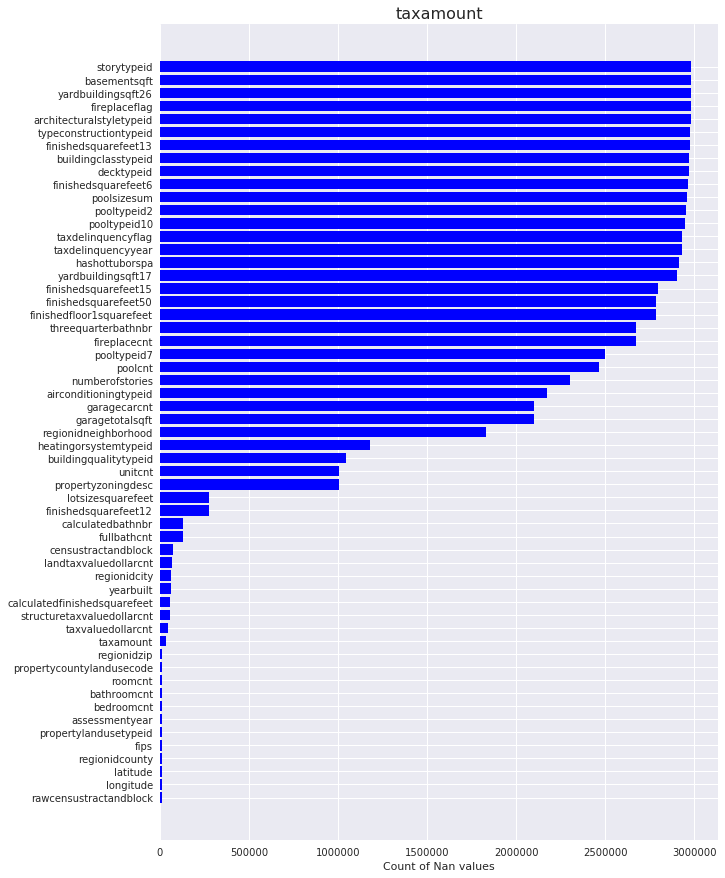

In [37]:
df_missing = df_prop.isnull().sum(axis=0).reset_index()
df_missing.columns = ['column_name', 'missing_count']
df_missing = df_missing.loc[df_missing['missing_count']>0]
df_missing = df_missing.sort_values(by='missing_count')

ind = np.arange(df_missing.shape[0])
fig, ax = plt.subplots(figsize=(10,15))
rects = ax.barh(ind, df_missing.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(df_missing.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of Nan values")
ax.set_title("Number of Nan values in each feature")
ax.set_title(col, fontsize=16)
#plt.grid()
plt.show()

In [120]:
total = len(df_prop)*1.0
count = 0
cols_to_drop2 = []
for col in df_prop.columns:
    missing_rate = df_prop[col].isnull().sum()/total
    if missing_rate > 0.25:
        print '{:32s}        {missing_rate}'.format( col, missing_rate = missing_rate)
        count += 1
        cols_to_drop2.append(col)
print 'there are {:2d} features that have more than 25% missing values'.format(count)

there are  0 features that have more than 25% missing values


#### Feature Selection
Drop features with extreme missingness, duplication, and zero variance. Variables with over 90% missingness and no feasible way to determine the correct value were dropped. If variables captured the same information, such as FIPS (Federal Information Processing Standard code) and Zip Code, we only kept one. Finally, variables with the same value across all observations were dropped as they would have had no impact on our model.

* Feature use without modification: 
['fips', 'landtaxvaluedollarcnt', 'lotsizesquarefeet', 'structuretaxvaluedollarcnt', 'taxamount', 'taxvaluedollarcnt', 'buildingqualitytypeid']

* Numeric features filling null with 0:
['basementsqft', 'fireplacecnt', 'poolcnt', 'poolsizesum', 'roomcnt', 'fullbathcnt', 'threequarterbathnbr', 'bathroomcnt', 'calculatedbathnbr', 'calculatedfinishedsquarefeet', 'taxdelinquencyyear']
	
* Area related numeric features filling null with 0:
['finishedfloor1squarefeet', 'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6',  'yardbuildingsqft17', 'yardbuildingsqft26']

* Numeric features filling null with NaN values:
['bedroomcnt', 'yearbuilt', 'garagecarcnt', 'garagetotalsqft', 'numberofstories', 'unitcnt']

* Boolean features:
['fireplaceflag', 'hashottuborspa', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7']


#### Target Variable

The target variable is legerror, whcih has symmeric ditribution with a mean value close to zero. This is not surprising since the log transformation has already been applied to Zestimate and sale price. Log transformation in an commonly used way to reduce the skewness of variables. Check the following distribution plot.

(-1, 1)

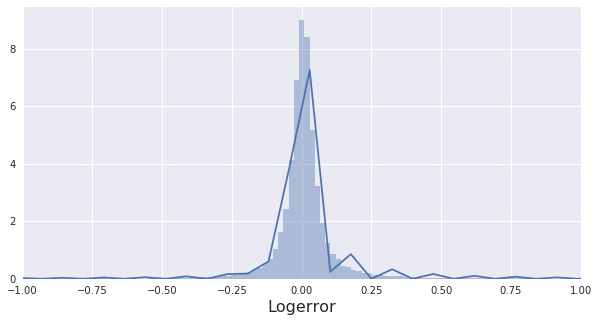

In [14]:
plt.figure(figsize=(10,5))
sns.distplot(df_train.logerror.values, bins=500)
plt.xlabel('Logerror', fontsize=16)
plt.xlim([-1,1])
#plt.grid()
#plt.show()


### Benchmark Model and Evaluation Metrics

Linear regression or logistic regresssion can be used as the initial reference models. In Zillow Kaggle competition, various teams apply different models to the data sets such as decision tree based models, support vector machines or neural networks. The competition web site provides a ranking tool and a public leaderboard that I plan to benchmark my results.   
<In this section, provide the details for a benchmark model or result that relates to the domain, problem statement, and intended solution. Ideally, the benchmark model or result contextualizes existing methods or known information in the domain and problem given, which could then be objectively compared to the solution. Describe how the benchmark model or result is measurable (can be measured by some metric and clearly observed) with thorough detail.>

Housing price prediction (6 time points future of training data set) will be submitted to the competition web site's ranking tool. With the submission I can get the evaluation on MAE (Mean Absolute Error) score between the predicted log error and the actual log error and also a position in the public leaderboard.

- MAE(logerror)
- logerror=log(Zestimate)−log(SalePrice)


<Evaluation Metrics: In this section, propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).>


### Project Design

After studying the data sets and features, rather than use all features, let's select a smaller set of features according to their importance in order to reduce model complexity. 
On the other hand, let's consider use a common practice, that is to add new features based on the most important features in our initial models. For example, add a metric to represent the ratio of the home’s structure tax to its land tax. 
In addition to feature selection and adding new features, another key technique is to removing outliers of selected features.Outliers if not removed from feature variables, they might have negative impact on machine learning performance. The criteria I use to identify outliers of numberical feature variable is to check if there are values greater than 3 times of its standard deviation (STD). I have found that there are outliers for several features. 

After we are done with feature preparation, let's try apply XGBoost, Newrual networks to build models for the predcition, and optimize the model by applying cross-validation and grid-serach parameter optimization. 

At last let's compare the score of each model, then apply ensemble method to the best models for further performance improvement. 

<Student summarizes a theoretical workflow for approaching a solution given the problem. Discussion is made as to what strategies may be employed, what analysis of the data might be required, or which algorithms will be considered. The workflow and discussion provided align with the qualities of the project. Small visualizations, pseudocode, or diagrams are encouraged but not required.>





In [58]:
#merge train and property data file to get training dataframe with all needed features
df_train_full = pd.merge(df_train, df_prop, on='parcelid', how='left')
df_train_full['transaction_month'] = df_train_full['transactiondate'].apply(lambda x: float(x[5:7]))


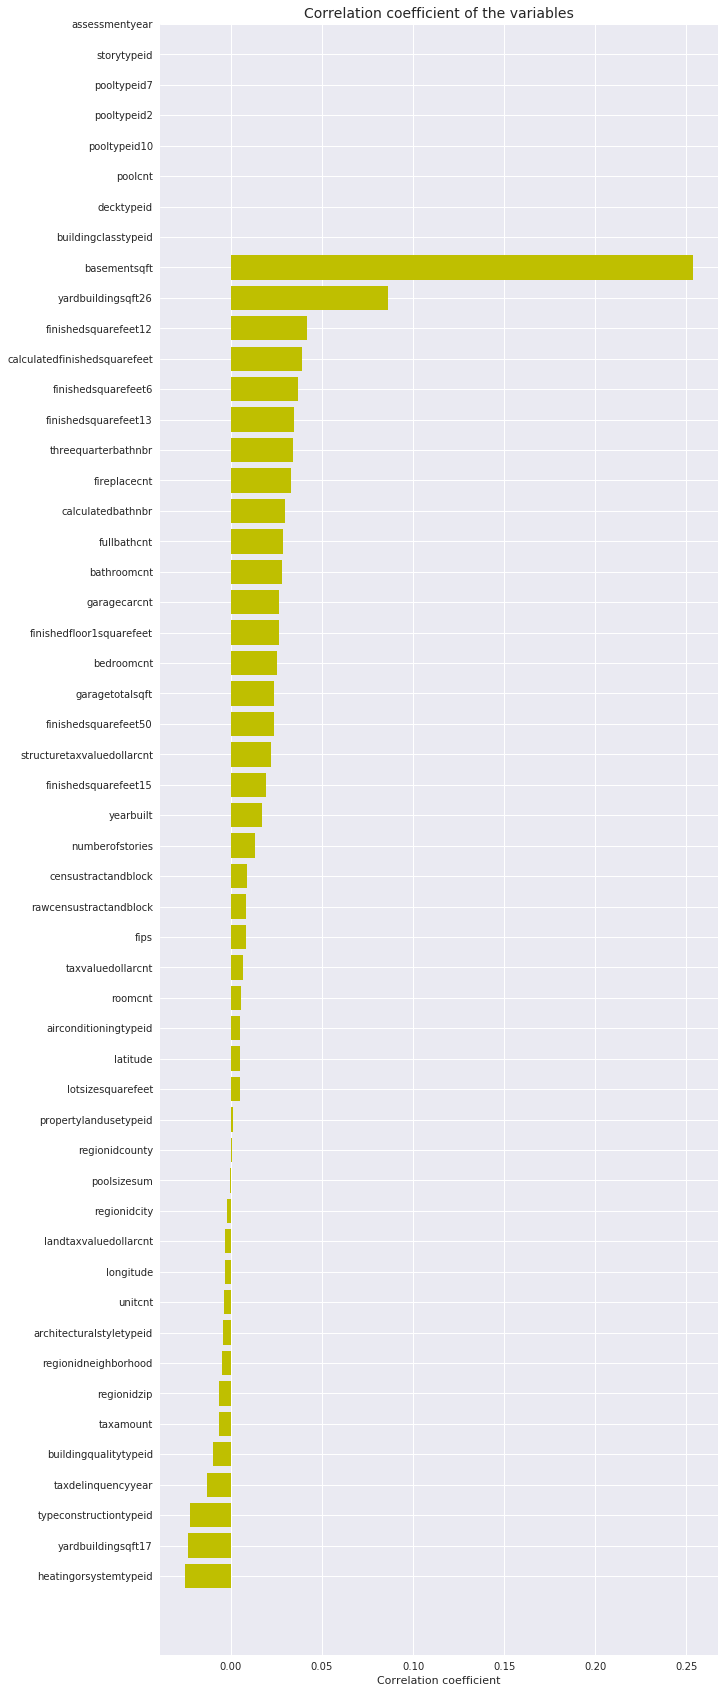

In [61]:
labels = []
values = []
for col in df_prop.columns:
    if df_prop[col].dtype==float:
        labels.append(col)
        tt=df_train_full[['logerror',col]].dropna()
        corr=np.corrcoef(tt[col], tt.logerror)
        if len(corr)>0:
            values.append(corr[0,1])
df_corr = pd.DataFrame({'col_labels':labels, 'corr_values':values})
df_corr = df_corr.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(10,30))
rects = ax.barh(ind, np.array(df_corr.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(df_corr.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()


Let's review the feature importances with an ensemble extra-trees regressor first. 

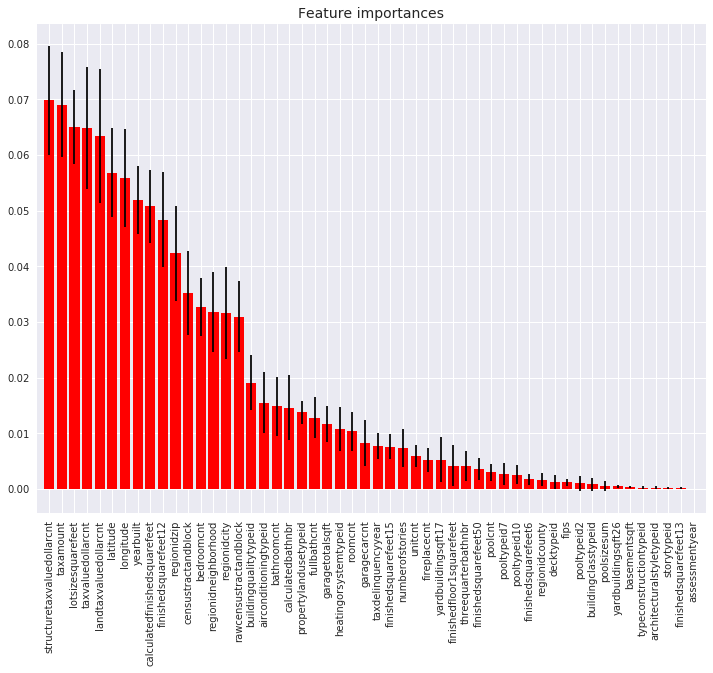

In [63]:
from sklearn import ensemble

Y_train = df_train_full['logerror'].values
cat_cols = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]
df_train_trial = df_train_full.drop(['parcelid', 'logerror', 'transactiondate', 'transaction_month']+cat_cols, axis=1)
df_train_trial = df_train_trial.fillna(-1)
feature_names = df_train_trial.columns.values

model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(df_train_trial, Y_train)

## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:60]

plt.figure(figsize=(12,9))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feature_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

####  Apply Machine Learning Algorithms

I plan to try the following algorithms: Random forest ---> Gradient Boosting Machine with parameter tuning ---> XGBoost with parameter tuning ---> MLP neural network. It is important to have several effective tools in my tool box and try them out. The rationale is as follows:

Since the traing data set is a mixture of binary, categorical and continuous numerical features, it is suitable to try decision trees at first. Decision trees result in model that can easily be visualized and understood by nonexperts (at least for smaller trees), and the algorithms are completely invariant to scaling of the features. The main downside of decision trees is that even with the use of pre-pruning, they tend to overfit and provide poor generalization performance. Therefore, in most applications, the ensemble methods are used in place of a single decision tree, such as random forest. A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data. If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results.Random forests for regression and classification are currently among the most widely used machine learning methods. They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

The gradient boosted regression tree(also called gradient boosting machines) is another ensemble method that combines multiple decision trees to create a more powerful model. Despite the “regression” in the name, these models can be used for regression and classification. In contrast to the random forest approach, gradient boosting works by building trees in a serial manner, where each tree tries to correct the mistakes of the previous one. By default, there is no randomization in gradient boosted regression trees; instead, strong pre-pruning is used. Gradient boosted trees often use very shallow trees, of depth one to five, which makes the model smaller in terms of memory and makes predictions faster. The main idea behind gradient boosting is to combine many simple models (in this context known as weak learners), like shallow trees. Each tree can only provide good
predictions on part of the data, and so more and more trees are added to iteratively improve performance. Gradient boosted trees are frequently the winning entries in machine learning competitions, and are widely used in industry. They are generally a bit more sensitive to parameter settings than random forests, but can provide better accuracy if the parameters are set correctly.Gradient boosted decision trees are among the most powerful and widely used models for supervised learning. Their main drawback is that they require careful tuning of the parameters and may take a long time to train. Similarly to other tree-based models, the algorithm works well without scaling and on a mixture of binary and continuous features. As with other tree-based models, it also often does not work well on high-dimensional sparse data[4].

XGBoost(eXtreme Gradient Boosting) is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data.  It was developed by Tianqi Chen and now is part of a wider collection of open-source libraries developed by the Distributed Machine Learning Community (DMLC). XGBoost is a scalable and accurate implementation of gradient boosting machines and it has proven to push the limits of computing power for boosted trees algorithms as it was built and developed for the sole purpose of model performance and computational speed. Because of its computation speed and model performance, it makes parameter tuning easier and improving performance further[5].

A family of algorithms known as neural networks has recently seen a revival under the name “deep learning.” While deep learning shows great promise in many machine learning applications, deep learning algorithms are often tailored very carefully to a
specific use case. In this project, I plan to try some relatively simple methods, namely multilayer perceptrons for classification and regression, that can serve as a starting point for more involved deep learning methods. Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural network[4]. One of their main advantages is that they are able to capture information contained in large amounts of data and build incredibly complex models. Given enough computation time, data, and careful tuning of the parameters, neural networks often beat other machine learning algorithms (for classification and regression tasks). The downsides of Neural networks—particularly the large and powerful ones—often take a long time to train. They also require careful preprocessing of the data, as we saw here. Similarly to SVMs, they work best with “homogeneous” data, where all the features have similar meanings. For data that has very different
kinds of features, tree-based models might work better. Tuning neural network parameters is also an art unto itself[4].



Based on proposal reviewer's recommendation of trying faster gradient boosting implementations with CatBoost or LightGBM, I tried LightGBM as follows. 
LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:
- Faster training speed and higher efficiency
- Lower memory usage
- Better accuracy
- Parallel and GPU learning supported
- Capable of handling large-scale data

LightGBM has been trained twice.
In first run 
 - Dropping the features cols_to_drop0 = ['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc','propertycountylandusecode', 'fireplacecnt', 'fireplaceflag']
 - Missing values are filled with median 
 
The first run produces submission_lightgmb.csv.gz with a score of 0.0650229, compared to the best score of 0.0631885. This score ranks 2627th in the public leaderboard of 3779 participants.

In second run
  - Dropping the features cols_to_drop1 = ['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc',                 'propertycountylandusecode', 'fireplacecnt', 'fireplaceflag',
  'fips','latitude','longitude','poolcnt',                   'rawcensustractandblock','regionidcounty','regionidneighborhood','regionidzip']
  as fips is federal information standard processing code which is not related to housing valuation, similar to latitude and longitude are numerical values that indicates house location which is already indicated by zipcode. Feature poolcnt is also dropped and pool size is consider more related to house value.
  - Missing values are filled with median
 
 
The second run of LightGBM produces submission_lightgbm2.csv.gz with a score of 0.0647524 (2165th), which is an improvement from using more features in the first run. 

Finally XGBoost model has been trained with the feature set that used in the second LightGBM run. It achieves a score of 0.0645364 (rank of 1502nd, inside the first half of the learderboard). This is an improvement from previous result using LightGBM.  However, LightGBM is faster to train and use less memory and it is very helpful with trying different feature selection and parameter configurations. 

For details, please check the following portion of the notebook.


In [2]:
import os
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import gc
import datetime

In [3]:
##### load zillow training data
data_path = '/home/voyiger/projects/zillow_data'
df_prop = pd.read_csv(os.path.join(data_path,'properties_2016.csv'))
df_train_0 = pd.read_csv(os.path.join(data_path,'train_2016_v2.csv'))

/home/voyiger/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
#dropping all these columns does not produce better score, instead filling missing values with median produces better score
'''
total = len(df_prop)*1.0
count = 0
cols_to_drop2 = []
for col in df_prop.columns:
    missing_rate = df_prop[col].isnull().sum()/total
    if missing_rate > 0.25:
        print '{:32s}        {missing_rate}'.format( col, missing_rate = missing_rate)
        count += 1
        cols_to_drop2.append(col)
print 'there are {:2d} features that have more than 25% missing values'.format(count)
'''

airconditioningtypeid                   0.72815410069
architecturalstyletypeid                0.997969661837
basementsqft                            0.999454646011
buildingclasstypeid                     0.995769486774
buildingqualitytypeid                   0.350637491345
decktypeid                              0.994273113144
finishedfloor1squarefeet                0.932093043822
finishedsquarefeet13                    0.997430002576
finishedsquarefeet15                    0.936085718392
finishedsquarefeet50                    0.932093043822
finishedsquarefeet6                     0.992630016511
fireplacecnt                            0.895271600021
garagecarcnt                            0.704119667012
garagetotalsqft                         0.704119667012
hashottuborspa                          0.976881412641
heatingorsystemtypeid                   0.394884525983
poolcnt                                 0.826634378673
poolsizesum                             0.990633846719
pooltypeid1

In [171]:
#Processing data for LightGBM
for c, dtype in zip(df_prop.columns, df_prop.dtypes):
    if dtype == np.float64:
        df_prop[c] = df_prop[c].astype(np.float32)

df_train = pd.merge(df_train_0,df_prop, how='left', on='parcelid')
#df_train.fillna(df_train.median(),inplace = True) #fill missing value with median

cols_to_drop0 = ['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 
                         'propertycountylandusecode', 'fireplacecnt', 'fireplaceflag']
col_missing_99 = ['architecturalstyletypeid',  'basementsqft',  'buildingclasstypeid',  #missing values > 99%
             'decktypeid',  'finishedsquarefeet13',  'finishedsquarefeet6',  'storytypeid',
             'typeconstructiontypeid',  'yardbuildingsqft26']
cols_to_drop1 = ['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 
                    'propertycountylandusecode', #'fireplacecnt', 'fireplaceflag',
                    'fips','latitude','longitude','poolcnt',
                   'rawcensustractandblock','regionidcounty','regionidneighborhood','regionidzip',
                 'taxdelinquencyyear']  + col_missing_99
                
x_train = df_train.drop(cols_to_drop1, axis=1)    #dropping cols_to_drop1 produces better score than cols_to_drop0
#x_train = df_train.drop(cols_to_drop2, axis=1)   #dropping cols_to_drop2 does not produce good score
y_train = df_train['logerror'].values
print(x_train.shape, y_train.shape)

((90275, 37), (90275,))


In [73]:
N = len(x_train)
col_missing_99 = []
for col in x_train.columns:
    rate = x_train[col].isnull().sum() * 1.0/N
    if rate > 0.99:
        col_missing_99.append(col)
        print col,rate

In [172]:
boolean_feature_list = ['fireplaceflag', 'hashottuborspa','taxdelinquencyflag']
for col in boolean_feature_list:
    #x_train[col] = x_train[col].map(lambda x: 1 if x else 0)
    x_train[col].fillna(False,inplace=True)

In [173]:
x_train['taxdelinquencyflag'] = x_train['taxdelinquencyflag'].map(lambda x: True if x == 'Y' else False)

In [174]:
#x_train.fillna('-1', inplace=True)
x_train.fillna(x_train.median(),inplace=True) 

,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet15,finishedsquarefeet50,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,censustractandblock
0,1.0,2.0,3.0,4.0,2.0,-1.0,1684.0,1684.0,-1.0,-1.0,...,1959.0,-1.0,0,122754.0,360170.0,2015.0,237416.0,6735.879883,False,6.037107e+13
1,-1.0,3.5,4.0,-1.0,3.5,-1.0,2263.0,2263.0,-1.0,-1.0,...,2014.0,-1.0,0,346458.0,585529.0,2015.0,239071.0,10153.019531,False,-1.000000e+00
2,1.0,3.0,2.0,4.0,3.0,-1.0,2217.0,2217.0,-1.0,-1.0,...,1940.0,-1.0,0,61994.0,119906.0,2015.0,57912.0,11484.480469,False,6.037464e+13
3,1.0,2.0,2.0,4.0,2.0,-1.0,839.0,839.0,-1.0,-1.0,...,1987.0,-1.0,0,171518.0,244880.0,2015.0,73362.0,3048.739990,False,6.037296e+13
4,-1.0,2.5,4.0,-1.0,2.5,-1.0,2283.0,2283.0,-1.0,-1.0,...,1981.0,2.0,0,169574.0,434551.0,2015.0,264977.0,5488.959961,False,6.059042e+13
5,1.0,4.0,4.0,1.0,4.0,-1.0,3067.0,3067.0,-1.0,-1.0,...,1982.0,-1.0,0,880650.0,2447951.0,2015.0,1567301.0,27126.570312,False,6.037621e+13
6,-1.0,1.0,2.0,7.0,1.0,-1.0,1297.0,1297.0,-1.0,-1.0,...,1939.0,-1.0,0,64549.0,111521.0,2015.0,46972.0,2304.969971,False,6.037542e+13
7,-1.0,2.5,3.0,-1.0,2.5,853.0,1763.0,1763.0,-1.0,853.0,...,1994.0,2.0,0,107000.0,306000.0,2015.0,199000.0,3745.500000,False,6.111003e+13
8,-1.0,1.0,2.0,-1.0,1.0,-1.0,796.0,796.0,-1.0,-1.0,...,1984.0,-1.0,0,66834.0,210064.0,2015.0,143230.0,2172.879883,False,6.059042e+13
9,-1.0,2.0,2.0,-1.0,2.0,-1.0,1260.0,1260.0,-1.0,-1.0,...,1977.0,1.0,0,109977.0,190960.0,2015.0,80983.0,1940.260010,False,6.059063e+13


In [74]:
x_train.head(10)

,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet15,finishedsquarefeet50,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,censustractandblock
0,1,2.0,3.0,4,2,-1,1684,1684,-1,-1,...,1959,-1,False,122754,360170,2015.0,237416,6735.88,False,6.03711e+13
1,-1,3.5,4.0,-1,3.5,-1,2263,2263,-1,-1,...,2014,-1,False,346458,585529,2015.0,239071,10153,False,-1
2,1,3.0,2.0,4,3,-1,2217,2217,-1,-1,...,1940,-1,False,61994,119906,2015.0,57912,11484.5,False,6.03746e+13
3,1,2.0,2.0,4,2,-1,839,839,-1,-1,...,1987,-1,False,171518,244880,2015.0,73362,3048.74,False,6.0373e+13
4,-1,2.5,4.0,-1,2.5,-1,2283,2283,-1,-1,...,1981,2,False,169574,434551,2015.0,264977,5488.96,False,6.05904e+13
5,1,4.0,4.0,1,4,-1,3067,3067,-1,-1,...,1982,-1,False,880650,2.44795e+06,2015.0,1.5673e+06,27126.6,False,6.03762e+13
6,-1,1.0,2.0,7,1,-1,1297,1297,-1,-1,...,1939,-1,False,64549,111521,2015.0,46972,2304.97,False,6.03754e+13
7,-1,2.5,3.0,-1,2.5,853,1763,1763,-1,853,...,1994,2,False,107000,306000,2015.0,199000,3745.5,False,6.111e+13
8,-1,1.0,2.0,-1,1,-1,796,796,-1,-1,...,1984,-1,False,66834,210064,2015.0,143230,2172.88,False,6.05904e+13
9,-1,2.0,2.0,-1,2,-1,1260,1260,-1,-1,...,1977,1,False,109977,190960,2015.0,80983,1940.26,False,6.05906e+13


In [175]:
train_columns = x_train.columns

for c in x_train.dtypes[x_train.dtypes == object].index.values:
    x_train[c] = (x_train[c] == True)

#del df_train; gc.collect()

x_train = x_train.values.astype(np.float32, copy=False)
d_train = lgb.Dataset(x_train, label=y_train)

In [105]:
params1 = {
    'boosting_type': 'gbdt',  #default=gbdt, type=enum, options=gbdt, rf, dart, goss, alias=boost,
    'objective': 'regression',
    'metric': 'l1',        # absolute loss, alias=mean_absolute_error, mae, regression_l1
    'verbose': 0,
    
    'max_bin': 10,
    'learning_rate': 0.0021, # shrinkage_rate
    'sub_feature':  0.5,     # feature_fraction
    'bagging_fraction': 0.85, # specifies the fraction of data to be used for each iteration and is generally used to speed up the training and avoid overfitting.
    'bagging_freq': 40,
    'num_leaves': 512,        # num_leaf
    'min_data': 500 ,        # min_data_in_leaf
    'min_hessian': 0.05     # min_sum_hessian_in_leaf
}

params2 = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'l1',        # or 'mae'
    'verbose': 0,
    
    'max_bin': 32,  
        #max_bin, default=255, type=int
        #max number of bins that feature values will be bucketed in. 
        #Small number of bins may reduce training accuracy but may increase general power (deal with over-fitting)
    
    'learning_rate': 0.0021,  # shrinkage_rate
    'sub_feature':  0.5,      # feature_fraction
    'bagging_fraction': 0.85, # specifies the fraction of data to be used for each iteration and is generally used to speed up the training and avoid overfitting.
    'bagging_freq': 40,
    'num_leaves': 512,        # number of leaves, default=31
    'min_data': 500,          #  default=20, alias min_data_in_leaf
    'min_hessian': 0.05       # min_sum_hessian_in_leaf,  default=1e-3
    
}
params3 = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'l1',        # or 'mae'
    'verbose': 0,
    
    'max_bin': 32,  
        #max_bin, default=255, type=int
        #max number of bins that feature values will be bucketed in. 
        #Small number of bins may reduce training accuracy but may increase general power (deal with over-fitting)
    
    'learning_rate': 0.0021,  # shrinkage_rate
    'sub_feature':  0.5,      # feature_fraction
    'bagging_fraction': 0.85, # specifies the fraction of data to be used for each iteration and is generally used to speed up the training and avoid overfitting.
    'bagging_freq': 40,
    'num_leaves': 256,        # number of leaves, default=31
    'min_data': 250,          #  default=20, alias min_data_in_leaf
    'min_hessian': 0.003       # min_sum_hessian_in_leaf,  default=1e-3
    
}
print("\nFitting LightGBM model ...")
#%timeit model = lgb.train(params, d_train, num_boost_round=430)
#model1 = lgb.train(params1, d_train, num_boost_round=430)
#model2 = lgb.train(params2, d_train, num_boost_round=430)
model3 = lgb.train(params3, d_train, num_boost_round=430)
print "\nDone"


Fitting LightGBM model ...

Done


In [ ]:
#del d_train; gc.collect()
#del x_train; gc.collect()

In [110]:
print("\nPrepare predication using LightGBM ...")
print("\nLoading sample submission file ...")
df_sample = pd.read_csv(os.path.join(data_path,'sample_submission.csv'))
df_sample['parcelid'] = df_sample['ParcelId']
print("\nMerge sample submission with property data ...")
df_test = pd.merge(df_sample,df_prop, on='parcelid', how='left')
#del df_sample, df_prop; gc.collect()

x_test = df_test[train_columns]
#x_test = df_test[train_columns2]
#del df_test; gc.collect()

print("\nPreparing x_test...")
for c in x_test.dtypes[x_test.dtypes == object].index.values:
    x_test[c] = (x_test[c] == True)

x_test = x_test.values.astype(np.float32, copy=False)

print("\nStart predication using LightGBM prediction ...")
# num_threads > 1 will predict very slow in kernal

model = model3
model.reset_parameter({"num_threads":1})
p_test = model.predict(x_test)

#del x_test; gc.collect()
print "\nDone"



Prepare predication using LightGBM ...

Loading sample submission file ...
 Merge sample submission with property data ...

Preparing x_test...


/home/voyiger/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app



Start predication using LightGBM prediction ...

Done


In [111]:
df_sample = pd.read_csv(os.path.join(data_path,'sample_submission.csv'))
df1 = pd.DataFrame(p_test).round(4)
res_lightgbm = pd.concat([df_sample['ParcelId'], df1,df1,df1,df1,df1,df1], axis=1)
res_lightgbm.columns = df_sample.columns

In [112]:
res_lightgbm.to_csv(os.path.join(data_path,'submission_lightgbm_m3.csv.gz'),index=None,compression='gzip')
#score =  0.0650229, drop all features that have more than 99% missing values
#score = 0.0649380, filling missing values with -1
#score = 0.0648117, filling missing values with median
#score = 0.0648105, parameters2 with max_bin = 32, increase from 10
#score = 0.0648567, parameters3

LightGBM (submission_lightgmb.csv.gz) produces a score of 0.0650229, compared to the best score of 0.0631885.
This score ranks 2627th in the public leaderboard of 3779 participants. 
After dropping more features, LightGBM (submission_lightgbm2.csv.gz) produces a score of 0.0647524 (2165th), which is an improvement from using more features in the training data set. 

# Apply GridSearchCV to LightGBM

In [186]:
from sklearn.model_selection import GridSearchCV, GroupKFold
np.random.seed(1)
# other scikit-learn modules
regressor = lgb.LGBMRegressor(num_leaves=31)

param_grid = {
    'learning_rate': [0.001,0.0021,0.01],
    'n_estimators': [20, 40],
    'max_bin': [10,32,60],
    'boosting_type': ['gbdt','dart'],
    'objective': ['regression'],
    'metric': ['l1'],        # or 'mae'
    'verbose': [0],
    'sub_feature':  [0.5],      # feature_fraction
    'bagging_fraction': [0.85], # specifies the fraction of data to be used for each iteration and is generally used to speed up the training and avoid overfitting.
    'bagging_freq': [40],
    'num_leaves': [256,512],        # number of leaves, default=31
    'min_data': [256,512],          #  default=20, alias min_data_in_leaf
    'min_hessian': [0.005,0.05]       # min_sum_hessian_in_leaf,  default=1e-3
}

model_gs = GridSearchCV(regressor, param_grid)
model_gs.fit(x_train, y_train)
print('Best parameters found by grid search are:', model_gs.best_params_)

('Best parameters found by grid search are:', {'num_leaves': 256, 'sub_feature': 0.5, 'min_hessian': 0.005, 'verbose': 0, 'bagging_fraction': 0.85, 'learning_rate': 0.01, 'min_data': 256, 'n_estimators': 40, 'max_bin': 60, 'objective': 'regression', 'bagging_freq': 40, 'metric': 'l1', 'boosting_type': 'gbdt'})


In [187]:
print("\nFitting LightGBM model with best parameters")
model_best = lgb.train(model_gs.best_params_, d_train, num_boost_round=430)
print "\nDone"


Fitting LightGBM model with best parameters

Done


In [188]:
print("\nPrepare predication using LightGBM with best parameters ...")
print("\nLoading sample submission file ...")
df_sample = pd.read_csv(os.path.join(data_path,'sample_submission.csv'))
df_sample['parcelid'] = df_sample['ParcelId']
print("\nMerge sample submission with property data ...")
df_test = pd.merge(df_sample,df_prop, on='parcelid', how='left')
#del df_sample, df_prop; gc.collect()

x_test = df_test[train_columns]
#x_test = df_test[train_columns2]
#del df_test; gc.collect()

print("\nPreparing x_test...")
for c in x_test.dtypes[x_test.dtypes == object].index.values:
    x_test[c] = (x_test[c] == True)

x_test = x_test.values.astype(np.float32, copy=False)

print("\nStart predication using LightGBM prediction ...")
# num_threads > 1 will predict very slow in kernal

model_best.reset_parameter({"num_threads":1})
p_test = model_best.predict(x_test)

#del x_test; gc.collect()
print "\nDone"


Prepare predication using LightGBM with best parameters ...

Loading sample submission file ...

Merge sample submission with property data ...

Preparing x_test...

Start predication using LightGBM prediction ...

Done


In [189]:
df_sample = pd.read_csv(os.path.join(data_path,'sample_submission.csv'))
df1 = pd.DataFrame(p_test).round(4)
res_lightgbm = pd.concat([df_sample['ParcelId'], df1,df1,df1,df1,df1,df1], axis=1)
res_lightgbm.columns = df_sample.columns

In [190]:
res_lightgbm.to_csv(os.path.join(data_path,'submission_lightgbm_best2.csv.gz'),index=None,compression='gzip')
#score = 0.0648530, smaller grid
#score = 0.0648389, larger grid


In [191]:
p_test = model_gs.predict(x_test)

In [192]:
df_sample = pd.read_csv(os.path.join(data_path,'sample_submission.csv'))
df1 = pd.DataFrame(p_test).round(4)
res_lightgbm = pd.concat([df_sample['ParcelId'], df1,df1,df1,df1,df1,df1], axis=1)
res_lightgbm.columns = df_sample.columns

In [193]:
res_lightgbm.to_csv(os.path.join(data_path,'submission_lightgbm_best3.csv.gz'),index=None,compression='gzip')
#score = 0.0648327

# Applying XGBoost

In [164]:
print( "\nProcessing data for XGBoost ...")


df_train = pd.merge(df_train_0,df_prop, how='left', on='parcelid')

cols_to_drop0 = ['parcelid', 'logerror','transactiondate']
cols_to_drop1 = ['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 
                    'propertycountylandusecode', #'fireplacecnt', 'fireplaceflag',
                    'fips','latitude','longitude','poolcnt',
                   'rawcensustractandblock','regionidcounty','regionidneighborhood','regionidzip',
                 'taxdelinquencyyear']  + col_missing_99
for c in df_prop.columns:
    df_prop[c]=df_prop[c].fillna(-1)
    if df_prop[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(df_prop[c].values))
        df_prop[c] = lbl.transform(list(dr_prop[c].values))

#x_test = df_prop.drop(['parcelid'], axis=1)
x_test = df_prop[x_train.columns]
# shape        
print('Shape train: {}\nShape test: {}'.format(x_train.shape, x_test.shape))

# drop out ouliers
df_train=df_train[ df_train.logerror > -0.4 ]
df_train=df_train[ df_train.logerror < 0.418 ]
x_train=df_train.drop(cols_to_drop1, axis=1)
y_train = df_train["logerror"].values.astype(np.float32)
y_mean = np.mean(y_train)

print('After removing outliers:')     
print('Shape train: {}\nShape test: {}'.format(x_train.shape, x_test.shape))


Processing data for XGBoost ...
Shape train: (88525, 37)
Shape test: (2985217, 37)
After removing outliers:
Shape train: (88525, 37)
Shape test: (2985217, 37)


In [163]:
x_test.columns

Index([u'airconditioningtypeid', u'architecturalstyletypeid', u'basementsqft',
       u'bathroomcnt', u'bedroomcnt', u'buildingclasstypeid',
       u'buildingqualitytypeid', u'calculatedbathnbr', u'decktypeid',
       u'finishedfloor1squarefeet', u'calculatedfinishedsquarefeet',
       u'finishedsquarefeet12', u'finishedsquarefeet13',
       u'finishedsquarefeet15', u'finishedsquarefeet50',
       u'finishedsquarefeet6', u'fips', u'fireplacecnt', u'fullbathcnt',
       u'garagecarcnt', u'garagetotalsqft', u'hashottuborspa',
       u'heatingorsystemtypeid', u'latitude', u'longitude',
       u'lotsizesquarefeet', u'poolcnt', u'poolsizesum', u'pooltypeid10',
       u'pooltypeid2', u'pooltypeid7', u'propertycountylandusecode',
       u'propertylandusetypeid', u'propertyzoningdesc',
       u'rawcensustractandblock', u'regionidcity', u'regionidcounty',
       u'regionidneighborhood', u'regionidzip', u'roomcnt', u'storytypeid',
       u'threequarterbathnbr', u'typeconstructiontypeid', u'unitc

In [165]:
##### RUN XGBOOST

print("\nSetting up data for XGBoost ...")
# xgboost params
xgb_params = {
    'eta': 0.037,
    'max_depth': 5,
    'subsample': 0.80,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'lambda': 0.8,   
    'alpha': 0.4, 
    'base_score': y_mean,
    'silent': 1,
    'num_boost_rounds':242
}
# Enough with the ridiculously overfit parameters.
# I'm going back to my version 20 instead of copying Jayaraman.
# I want a num_boost_rounds that's chosen by my CV,
# not one that's chosen by overfitting the public leaderboard.
# (There may be underlying differences between the train and test data
#  that will affect some parameters, but they shouldn't affect that.)

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)
print( "\nTraining XGBoost ...")
model = xgb.train(xgb_params, dtrain)

print( "\nPredicting with XGBoost ...")
pred = model.predict(dtest)

df1 = pd.DataFrame(pred)
df1 = df1.round(4)
res_xgb = pd.concat([df_sample['ParcelId'], df1,df1,df1,df1,df1,df1], axis=1)
print ( "\nDone.")


Setting up data for XGBoost ...

Training XGBoost ...

Predicting with XGBoost ...

Done.


In [159]:
x_train.head()

,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,1.0,-1.0,-1.0,2.0,3.0,-1.0,4.0,2.0,-1.0,-1.0,...,-1.0,0,122754.0,360170.0,2015.0,237416.0,6735.879883,0,-1.0,6.037107e+13
1,-1.0,-1.0,-1.0,3.5,4.0,-1.0,-1.0,3.5,-1.0,-1.0,...,-1.0,0,346458.0,585529.0,2015.0,239071.0,10153.019531,0,-1.0,-1.000000e+00
2,1.0,-1.0,-1.0,3.0,2.0,-1.0,4.0,3.0,-1.0,-1.0,...,-1.0,0,61994.0,119906.0,2015.0,57912.0,11484.480469,0,-1.0,6.037464e+13
3,1.0,-1.0,-1.0,2.0,2.0,-1.0,4.0,2.0,-1.0,-1.0,...,-1.0,0,171518.0,244880.0,2015.0,73362.0,3048.739990,0,-1.0,6.037296e+13
4,-1.0,-1.0,-1.0,2.5,4.0,-1.0,-1.0,2.5,-1.0,-1.0,...,2.0,0,169574.0,434551.0,2015.0,264977.0,5488.959961,0,-1.0,6.059042e+13


In [138]:
res_xgb.head()

,ParcelId,0,0,0,0,0,0
0,10754147,-0.0086,-0.0086,-0.0086,-0.0086,-0.0086,-0.0086
1,10759547,-0.0083,-0.0083,-0.0083,-0.0083,-0.0083,-0.0083
2,10843547,0.0109,0.0109,0.0109,0.0109,0.0109,0.0109
3,10859147,0.0100,0.0100,0.0100,0.0100,0.0100,0.0100
4,10879947,0.0057,0.0057,0.0057,0.0057,0.0057,0.0057


In [142]:
df_sample = pd.read_csv(os.path.join(data_path,'sample_submission.csv'))


In [166]:
res_xgb.columns = df_sample.columns
res_xgb.to_csv(os.path.join(data_path,'submission_xgb_m1_dropped.csv.gz'),index=None,float_format='%.4f', compression='gzip')

#score = 0.0649886, submission_xgb_m1.csv.gz
#score = 0.0650131, submission_xgb_m1_dropped.csv.gz


# GridSearchCV with XGBRegressor

In [144]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [152]:
xgb1 = XGBRegressor()
parameter_grid = {
        'nthread':[4], #when use hyperthread, xgboost may become slower
        'objective':['reg:linear'],
        'learning_rate': [.037, 0.05, .07], #so called `eta` value
        'max_depth': [5, 6, 7],
        'min_child_weight': [4],
        'silent': [1],
        'subsample': [0.7, 0.8,0.9],
        'colsample_bytree': [0.7],
        #'eval_metric': ['mae'],
        #'lambda': [0.8],   
        #'alpha': [0.4],
        'base_score': [y_mean],
        #'num_boost_rounds':[242],
        'silent': [1],
        'n_estimators': [500]}

'''
xgb_params = {
    'eta': 0.037,
    'max_depth': 5,
    'subsample': 0.80,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'lambda': 0.8,   
    'alpha': 0.4,
    'base_score': y_mean,
    'silent': 1,
    'num_boost_rounds':242 }'''
xgb_grid = GridSearchCV(xgb1,
                        parameter_grid,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)
xgb_grid.fit(x_train, y_train)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed: 20.6min
[Parallel(n_jobs=5)]: Done  81 out of  81 | elapsed: 43.8min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=5,
       param_grid={'n_estimators': [500], 'subsample': [0.7, 0.8, 0.9], 'colsample_bytree': [0.7], 'silent': [1], 'objective': ['reg:linear'], 'learning_rate': [0.037, 0.05, 0.07], 'base_score': [0.0076136235], 'nthread': [4], 'min_child_weight': [4], 'max_depth': [5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [153]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.0206483345067
{'colsample_bytree': 0.7, 'silent': 1, 'learning_rate': 0.037, 'nthread': 4, 'base_score': 0.0076136235, 'n_estimators': 500, 'subsample': 0.9, 'min_child_weight': 4, 'objective': 'reg:linear', 'max_depth': 5}


In [154]:

print( "\nTraining XGBoost with best parameters...")
model = xgb.train(xgb_grid.best_params_, dtrain)

print( "\nPredicting with XGBoost ...")
pred = model.predict(dtest)

df1 = pd.DataFrame(pred)
df1 = df1.round(4)
res_xgb = pd.concat([df_sample['ParcelId'], df1,df1,df1,df1,df1,df1], axis=1)
print ( "\nDone.")


Training XGBoost with best parameters...

Predicting with XGBoost ...

Done.


In [155]:
res_xgb.columns = df_sample.columns
res_xgb.to_csv(os.path.join(data_path,'submission_xgb_best.csv.gz'),index=None,float_format='%.4f', compression='gzip')

#score = 0.0649962

In [133]:
df_train.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,-1.0,-1.0,2.0,3.0,-1.0,4.0,...,-1.0,0,122754.0,360170.0,2015.0,237416.0,6735.879883,0,-1.0,6.037107e+13
1,14366692,-0.1684,2016-01-01,-1.0,-1.0,-1.0,3.5,4.0,-1.0,-1.0,...,-1.0,0,346458.0,585529.0,2015.0,239071.0,10153.019531,0,-1.0,-1.000000e+00
2,12098116,-0.0040,2016-01-01,1.0,-1.0,-1.0,3.0,2.0,-1.0,4.0,...,-1.0,0,61994.0,119906.0,2015.0,57912.0,11484.480469,0,-1.0,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,-1.0,-1.0,2.0,2.0,-1.0,4.0,...,-1.0,0,171518.0,244880.0,2015.0,73362.0,3048.739990,0,-1.0,6.037296e+13
4,14432541,-0.0050,2016-01-02,-1.0,-1.0,-1.0,2.5,4.0,-1.0,-1.0,...,2.0,0,169574.0,434551.0,2015.0,264977.0,5488.959961,0,-1.0,6.059042e+13


In [128]:
cols_to_drop1 = ['parcelid', 'logerror','transactiondate']
cols_to_drop2 = ['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 
                    'propertycountylandusecode', 'fireplacecnt', 'fireplaceflag',
                    'fips','latitude','longitude','poolcnt',
                   'rawcensustractandblock','regionidcounty','regionidneighborhood','regionidzip']
col_missing_99 = ['architecturalstyletypeid',  'basementsqft',  'buildingclasstypeid',  #missing values > 99%
             'decktypeid',  'finishedsquarefeet13',  'finishedsquarefeet6',  'storytypeid',
             'typeconstructiontypeid',  'yardbuildingsqft26']
cols_to_drop3 = ['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 
                    'propertycountylandusecode', #'fireplacecnt', 'fireplaceflag',
                    'fips','latitude','longitude','poolcnt',
                   'rawcensustractandblock','regionidcounty','regionidneighborhood','regionidzip',
                 'taxdelinquencyyear']  + col_missing_99


(88431, 37) (88431,)


In [129]:
#Train and predict with XGBoost
print("\nSetting up data for XGBoost ...")
# configure XGBoost params
xgb_params1 = {
    'eta': 0.037,
    'max_depth': 5,
    'subsample': 0.80,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'lambda': 0.8,   
    'alpha': 0.4, 
    'base_score': np.mean(y_train),
    'silent': 1,
    'num_boost_round':256
}

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)

#num_boost_rounds = 215  # number of boost rounds does not affect the performance much
#num_boost_rounds = 430
# train XGBoost model
print( "\nTraining XGBoost ...")
#%timeit model = xgb.train(dict(xgb_params, silent=1), dtrain, num_boost_round=num_boost_rounds)
model1 = xgb.train(xgb_params1, dtrain)
print( "\nDone.")


Setting up data for XGBoost ...

Training XGBoost ...

Done.


In [130]:
df_sample = pd.read_csv(os.path.join(data_path,'sample_submission.csv'))
df_sample['parcelid'] = df_sample['ParcelId']
print("\nMerge sample submission with property data ...")
df_test = pd.merge(df_sample,df_prop, on='parcelid', how='left')
#del df_sample, df_prop; gc.collect()

print("\nPreparing x_test...")
x_test = df_test[x_train.columns]
for c in x_test.dtypes[x_test.dtypes == object].index.values:
    x_test[c] = (x_test[c] == True)
x_test = x_test.values.astype(np.float32, copy=False)


Merge sample submission with property data ...

Preparing x_test...


In [99]:
res_xgb.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,-0.0447,-0.0447,-0.0447,-0.0447,-0.0447,-0.0447
1,10759547,-0.0336,-0.0336,-0.0336,-0.0336,-0.0336,-0.0336
2,10843547,0.0485,0.0485,0.0485,0.0485,0.0485,0.0485
3,10859147,0.0868,0.0868,0.0868,0.0868,0.0868,0.0868
4,10879947,0.0034,0.0034,0.0034,0.0034,0.0034,0.0034


In [119]:
res_xgb.to_csv(os.path.join(data_path,'submission_xgb_m1.csv.gz'),index=None,float_format='%.4f', compression='gzip')

#score = 0.0659208, model1 with parameters1




XGBoost achieves a score of 0.0645364 (rank of 1502nd, inside the first half of the learderboard). This is an improvement from previous result using lightgbm. 
After dropping features, submission_xgb2.csv got the same score 0.0645364. 

#### References
- [1] Working with missing data in machine learning. 
https://towardsdatascience.com/working-with-missing-data-in-machine-learning-9c0a430df4ce
- [2] Data type difference between categorical, ordinal and numerical features.   https://stats.stackexchange.com/questions/312437/statistical-data-types-difference-between-categorical-ordinal-and-numerical

- [3] https://stackoverflow.com/questions/45515031/how-to-remove-columns-with-too-many-missing-values-in-python

- [4] Introduction to Machine Learning with Python: A Guide for Data Scientists

- [5] XGBoost: A Scalable Tree Boosting System. https://arxiv.org/abs/1603.02754

- [6] Light Gradient Boosting Machine. https://lightgbm.readthedocs.io/en/latest/